<a href="https://colab.research.google.com/github/gndede/API-with-PHP-MySQL/blob/master/MSDS_7330_Database_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mysqlclient
!pip install pymysql
!pip install mysqlclient pymysql
!pip install MySQL-python
!pip install mySQL-connector

In [ ]:
#pip install chart_studio

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import mean
from numpy import std
from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.pyplot as plot

#plotly graphing
import plotly.graph_objs as go
#from chart_studio import plotly
import plotly.offline as pyoff
#MySQL Database connector
import MySQLdb
import pymysql
# Connecting to mysql database
import mysql.connector

sns.set_theme(style="ticks", color_codes=True)
#Connector to the DB
conn = MySQLdb.connect(host="sql3.freemysqlhosting.net", user="sql3426897", passwd="eS4crMX8RG", db="sql3426897")
#mycursor = conn.cursor()
cursor = conn.cursor()
conn = MySQLdb.connect(host="sql3.freemysqlhosting.net", user="sql3426897", passwd="eS4crMX8RG", db="sql3426897")
mycursor = conn.cursor()

In [ ]:
cursor.execute('select * from `esther`');
rows = cursor.fetchall()
str(rows)[0:300]
dataframing = pd.DataFrame(rows)
dataframing .rename(columns={0:'id', 1: 'States', 2:'State Pop.', 3:'Age_18_to_24',  4:'Age_18_to_24', 5:'Age_25_to_34', 6:'Age_35_to_44', 7:'Age_45_to_54',8:'Age_55_to_64', 9:'Non_Elderly', 10:'%_of_Non_Elderly'}, inplace=True);
dataframing.head()

,id,States,State Pop.,Age_18_to_24,Age_18_to_24,Age_25_to_34,Age_35_to_44,Age_45_to_54,Age_55_to_64,Non_Elderly,%_of_Non_Elderly
0,1,Alabama,4921532,264900,170600,281100,348100,443800,451200,1959800,50%
1,2,Alaska,731158,44600,30200,54200,53400,67900,76200,326400,50%
2,3,Arizona,7421401,386200,245300,414300,490000,607500,619900,2763200,50%
3,4,Arkansas,3030522,168500,103900,172900,206600,263400,262100,1177500,50%
4,5,California,39368078,2171900,1446200,2654100,3011300,3813800,3581700,16679100,50%


In [ ]:
#Connector to the DB
cursor.execute('select * from District');
rows1 = cursor.fetchall()
str(rows1)[0:300]
dataframing = pd.DataFrame(rows1)
dataframing.rename(columns={0:'id', 1: 'States', 2: 'District Rep.', 3:'Age_0_to_17', 4:'Age_18_to_24', 5:'Age_25_to_34', 6:'Age_35_to_44', 7:'Age_45_to_54',8:'Age_55_to_64', 9:'Non_Elderly', 10:'%_of_Non_Elderly'}, inplace=True);
dataframing.head()
#dataframing.groupby(['States', 'District Rep.']).agg({'Age_0_to_17': ['mean']}).reset_index()

,id,States,District Rep.,Age_0_to_17,Age_18_to_24,Age_25_to_34,Age_35_to_44,Age_45_to_54,Age_55_to_64,Non_Elderly,%_of_Non_Elderly
0,1,Alabama,Bradley Byrne (AL-1),"39,200","22,300","40,700","49,700","63,500","65,100","280,500",50%
1,2,Alabama,Martha Roby (AL-2),"38,200","23,700","41,600","48,900","61,200","62,100","275,700",50%
2,3,Alabama,Mike Rogers (AL-3),"37,400","29,200","38,500","50,200","63,400","64,000","282,700",50%
3,4,Alabama,Robert B. Aderholt (AL-4),"37,800","19,900","36,900","48,600","61,400","63,900","268,500",50%
4,5,Alabama,Mo Brooks (AL-5),"37,600","23,900","40,600","50,000","74,100","69,800","296,000",51%


In [ ]:
#Connector to the DB
cursor.execute('select * from StatesPop');
rows1 = cursor.fetchall()
str(rows1)[0:300]
dataframing = pd.DataFrame(rows1)
dataframing .rename(columns={0:'id', 1: 'States', 2: 'Population'}, inplace=True);
dataframing.head()

,id,States,Population
0,1,Alabama,4921532
1,2,Alaska,731158
2,3,Arizona,7421401
3,4,Arkansas,3030522
4,5,California,39368078


In [ ]:
df = pd.DataFrame( [[ij for ij in i] for i in rows] )
#renaming the column heads
df.rename(columns={0:'id', 1: 'States', 2: 'Age_0_to_17', 3: 'Age_18_to_24', 4: 'Age_25_to_34', 5: 'Age_35_to_44', 6:'Age_45_to_54',7:'Age_55_to_64',8:'Non-Elderly',9:'%-Non-Elderly'}, inplace=True);
df.head(5)

,id,States,Age_0_to_17,Age_18_to_24,Age_25_to_34,Age_35_to_44,Age_45_to_54,Age_55_to_64,Non-Elderly,%-Non-Elderly,10
0,1,Alabama,4921532,264900,170600,281100,348100,443800,451200,1959800,50%
1,2,Alaska,731158,44600,30200,54200,53400,67900,76200,326400,50%
2,3,Arizona,7421401,386200,245300,414300,490000,607500,619900,2763200,50%
3,4,Arkansas,3030522,168500,103900,172900,206600,263400,262100,1177500,50%
4,5,California,39368078,2171900,1446200,2654100,3011300,3813800,3581700,16679100,50%


In [ ]:
df1 = pd.DataFrame( [[ij for ij in i] for i in rows])
#renaming the column heads
df1.rename(columns={0:'id', 1:'States', 2: 'Dist. Rep.', 3: 'Age_0_to_17', 4: 'Age_18_to_24', 5: 'Age_25_to_34', 6:'Age_35_to_44',7:'Age_45_to_54',8:'Age_55_to_64',9:'Non-Elderly',9:'%-Non-Elderly'}, inplace=True);
#df1.head()
df1

,id,States,Dist. Rep.,Age_0_to_17,Age_18_to_24,Age_25_to_34,Age_35_to_44,Age_45_to_54,Age_55_to_64,%-Non-Elderly,10
0,1,Alabama,4921532,264900,170600,281100,348100,443800,451200,1959800,50%
1,2,Alaska,731158,44600,30200,54200,53400,67900,76200,326400,50%
2,3,Arizona,7421401,386200,245300,414300,490000,607500,619900,2763200,50%
3,4,Arkansas,3030522,168500,103900,172900,206600,263400,262100,1177500,50%
4,5,California,39368078,2171900,1446200,2654100,3011300,3813800,3581700,16679100,50%
5,6,Colorado,5807719,299300,193800,377200,429200,519000,532500,2350900,51%
6,7,Connecticut,3557006,182100,129400,201400,250500,387200,390500,1541100,52%
7,8,Delaware,986809,48600,32500,56300,63100,93100,95500,389100,51%
8,9,District of Columbia,712816,28100,29900,69700,55700,55800,52000,291300,50%
9,10,Florida,21733312,973800,645200,1162000,1388700,1879800,1760800,7810300,51%


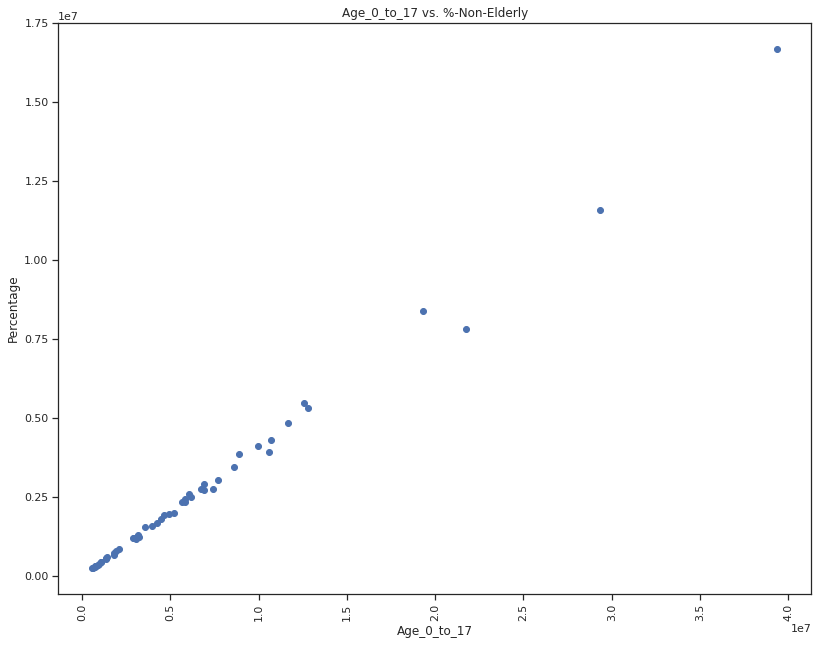

In [ ]:
plt.scatter(df['Age_0_to_17'], df1['%-Non-Elderly'])
#https://www.tutorialspoint.com/how-to-make-two-plots-side-by-side-using-python
plt.title('Age_0_to_17 vs. %-Non-Elderly')

plt.ylabel('Percentage')
#from matplotlib.pyplot import figure

#figure(figsize=(11, 5), dpi=80)
plt.xlabel('Age_0_to_17')
plt.xticks(rotation = 90)
plt.show()

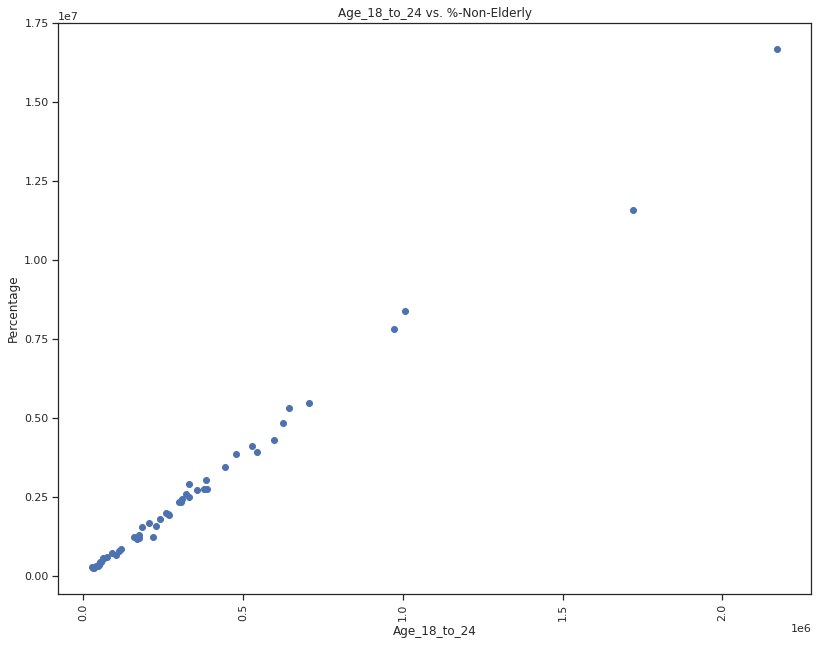

In [ ]:
plt.scatter(df['Age_18_to_24'], df1['%-Non-Elderly'])
#https://www.tutorialspoint.com/how-to-make-two-plots-side-by-side-using-python
plt.title('Age_18_to_24 vs. %-Non-Elderly')

plt.ylabel('Percentage')
#from matplotlib.pyplot import figure

#figure(figsize=(11, 5), dpi=80)
plt.xlabel('Age_18_to_24')
plt.xticks(rotation = 90)
plt.show()

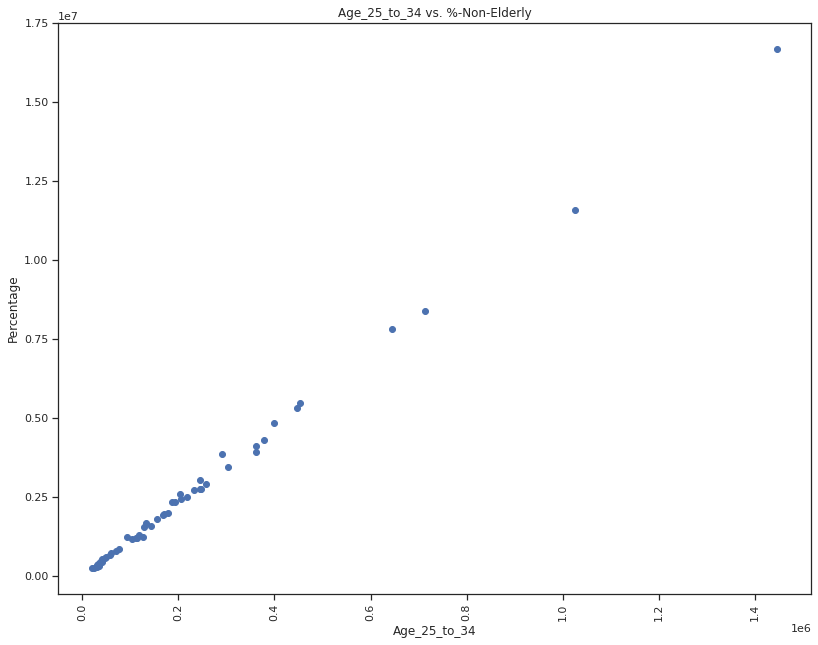

In [ ]:
plt.scatter(df['Age_25_to_34'], df1['%-Non-Elderly'])
#https://www.tutorialspoint.com/how-to-make-two-plots-side-by-side-using-python
plt.title('Age_25_to_34 vs. %-Non-Elderly')

plt.ylabel('Percentage')
#from matplotlib.pyplot import figure

#figure(figsize=(11, 5), dpi=80)
plt.xlabel('Age_25_to_34')
plt.xticks(rotation = 90)
plt.show()

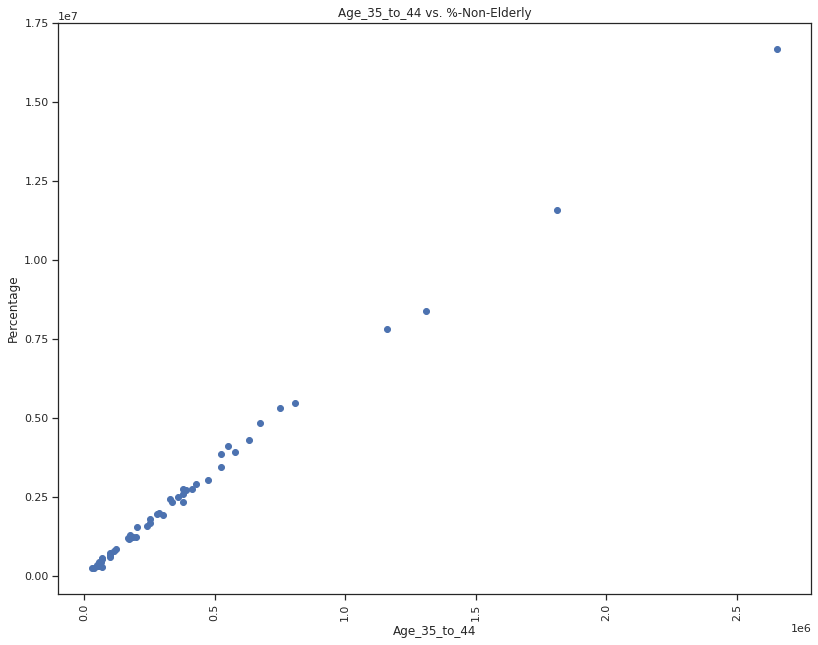

In [ ]:
plt.scatter(df['Age_35_to_44'], df1['%-Non-Elderly'])
#https://www.tutorialspoint.com/how-to-make-two-plots-side-by-side-using-python
plt.title('Age_35_to_44 vs. %-Non-Elderly')

plt.ylabel('Percentage')
#from matplotlib.pyplot import figure

#figure(figsize=(11, 5), dpi=80)
plt.xlabel('Age_35_to_44')
plt.xticks(rotation = 90)
plt.show()

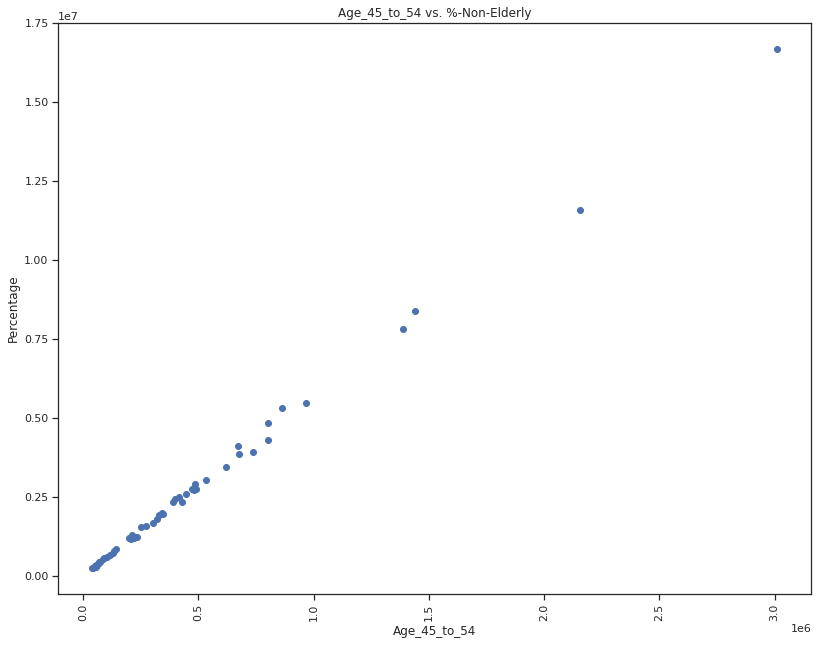

In [ ]:
plt.scatter(df['Age_45_to_54'], df1['%-Non-Elderly'])
#https://www.tutorialspoint.com/how-to-make-two-plots-side-by-side-using-python
plt.title('Age_45_to_54 vs. %-Non-Elderly')

plt.ylabel('Percentage')
#from matplotlib.pyplot import figure

#figure(figsize=(11, 5), dpi=80)
plt.xlabel('Age_45_to_54')
plt.xticks(rotation = 90)
plt.show()

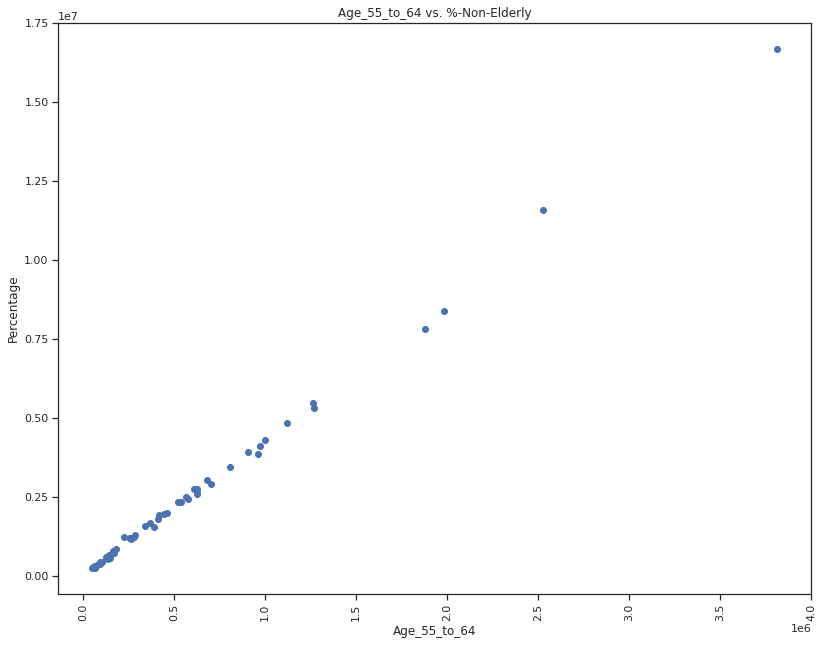

In [ ]:
plt.scatter(df['Age_55_to_64'], df1['%-Non-Elderly'])
#https://www.tutorialspoint.com/how-to-make-two-plots-side-by-side-using-python
plt.title('Age_55_to_64 vs. %-Non-Elderly')

plt.ylabel('Percentage')
#from matplotlib.pyplot import figure

#figure(figsize=(11, 5), dpi=80)
plt.xlabel('Age_55_to_64')
plt.xticks(rotation = 90)
plt.show()

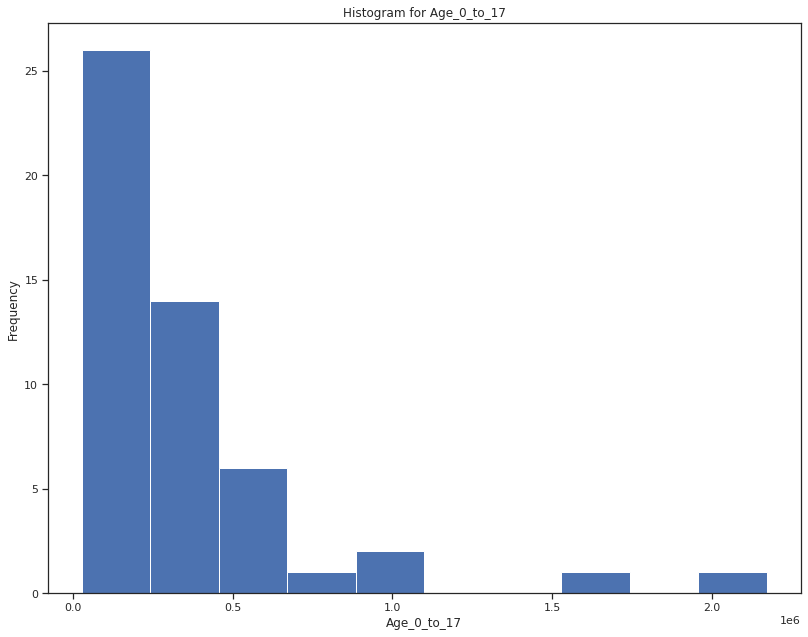

In [ ]:
plt.hist(df1['Age_0_to_17'])
plt.xlabel('Age_0_to_17')
plt.ylabel('Frequency')
plt.title('Histogram for Age_0_to_17')
plt.show()

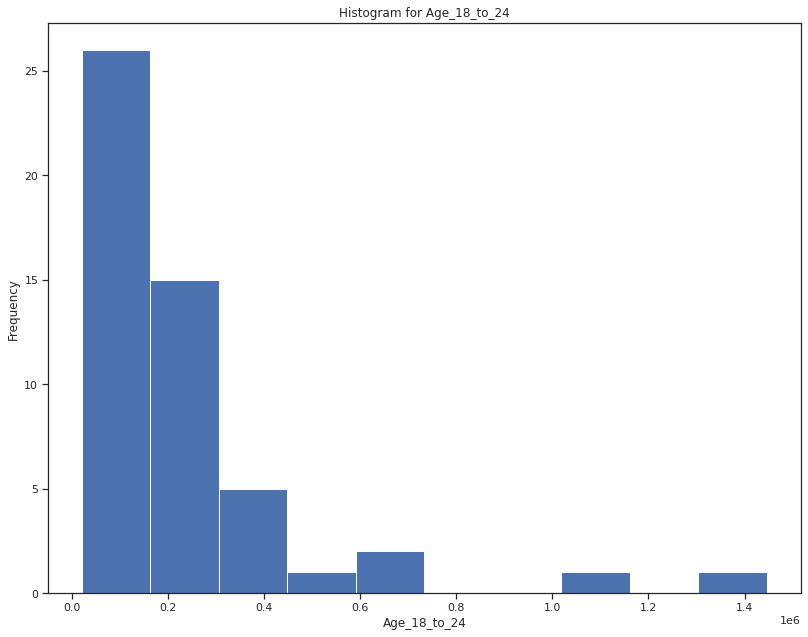

In [ ]:
plt.hist(df1['Age_18_to_24'])
plt.xlabel('Age_18_to_24')
plt.ylabel('Frequency')
plt.title('Histogram for Age_18_to_24')
plt.show()

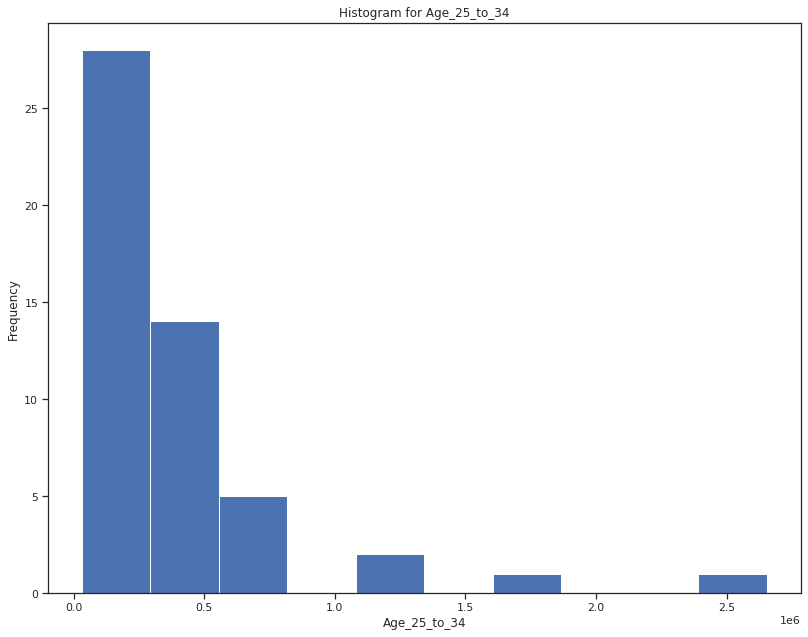

In [ ]:
plt.hist(df1['Age_25_to_34'])
plt.xlabel('Age_25_to_34')
plt.ylabel('Frequency')
plt.title('Histogram for Age_25_to_34')
plt.show()

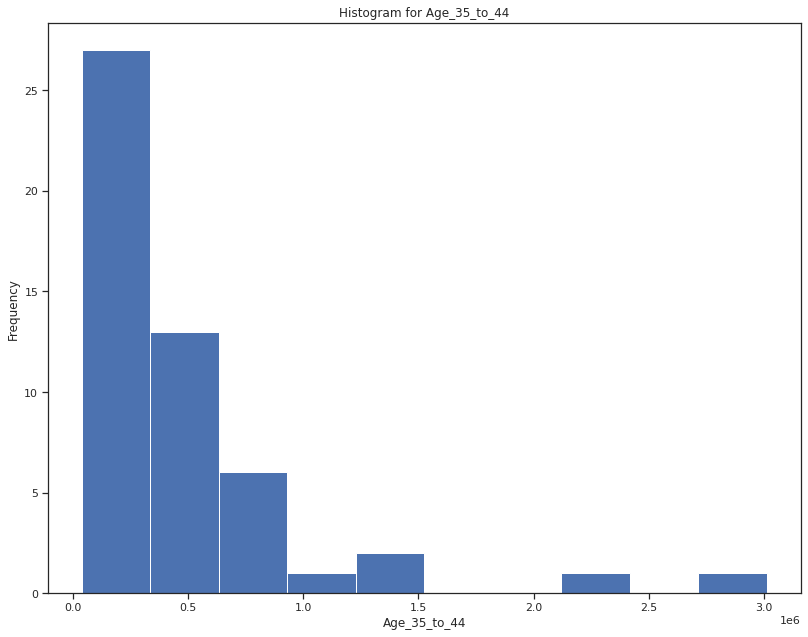

In [ ]:
plt.hist(df1['Age_35_to_44'])
plt.xlabel('Age_35_to_44')
plt.ylabel('Frequency')
plt.title('Histogram for Age_35_to_44')
plt.show()

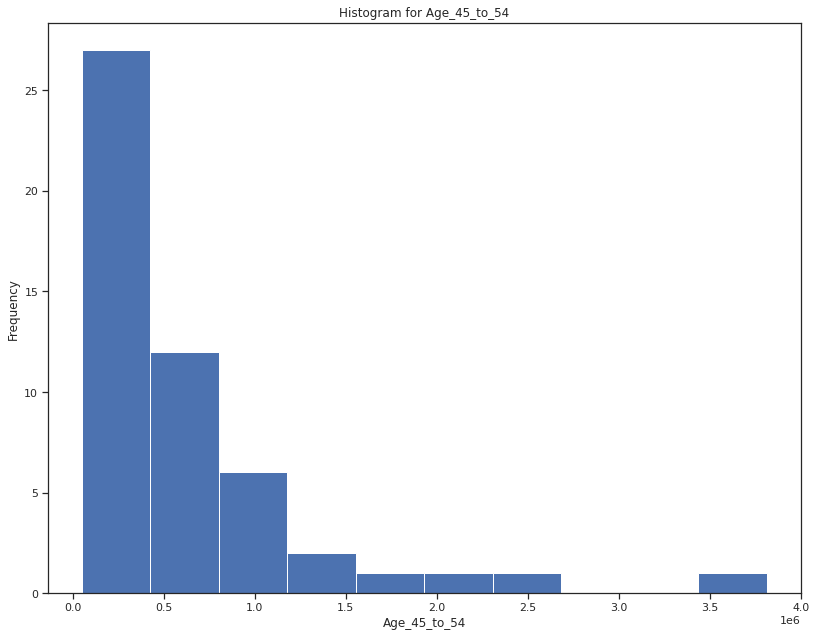

In [ ]:
plt.hist(df1['Age_45_to_54'])
plt.xlabel('Age_45_to_54')
plt.ylabel('Frequency')
plt.title('Histogram for Age_45_to_54')
plt.show()

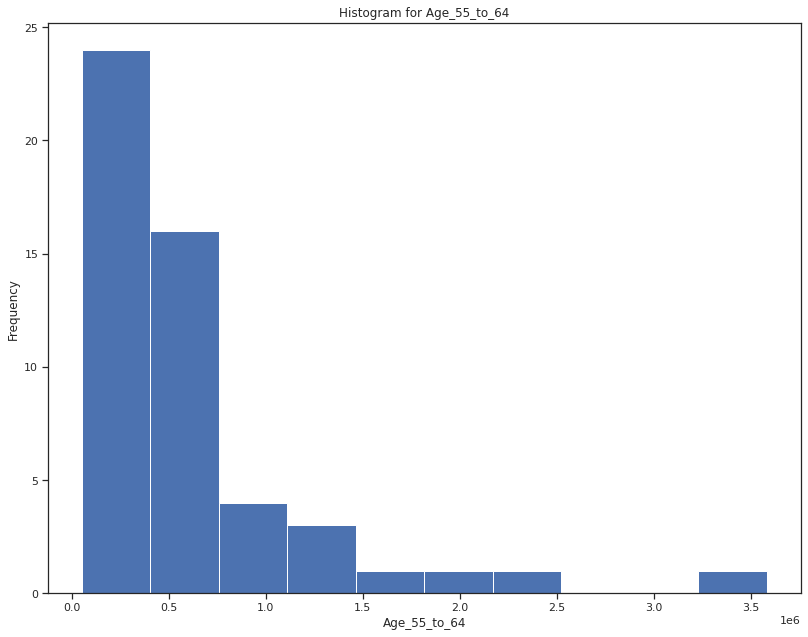

In [ ]:
plt.hist(df1['Age_55_to_64'])
plt.xlabel('Age_55_to_64')
plt.ylabel('Frequency')
plt.title('Histogram for Age_55_to_64')
plt.show()

In [ ]:
'''df2 = pd.DataFrame( [[ij for ij in i] for i in rows1] )
#renaming the column heads
df2.rename(columns={0: 'Id', 1:'States', 2: 'Age_0_to_17', 3: 'Age_0_to_17', 4: 'Age_18_to_24', 5: 'Age_25_to_34', 6:'Age_35_to_44',7:'Age_45_to_54',8:'Age_55_to_64',9:'Non-Elderly',9:'%-Non-Elderly'}, inplace=True);
df2_grp = df2.groupby('States')
header = df2_grp.first()
header.head()'''

"df2 = pd.DataFrame( [[ij for ij in i] for i in rows1] )\n#renaming the column heads\ndf2.rename(columns={0: 'Id', 1:'States', 2: 'Age_0_to_17', 3: 'Age_0_to_17', 4: 'Age_18_to_24', 5: 'Age_25_to_34', 6:'Age_35_to_44',7:'Age_45_to_54',8:'Age_55_to_64',9:'Non-Elderly',9:'%-Non-Elderly'}, inplace=True);\ndf2_grp = df2.groupby('States')\nheader = df2_grp.first()\nheader.head()"

Name of States =  ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire']
Age of Percent_of_Nonelderly Pre-existing Conditions =  [Decimal('0.50'), Decimal('0.50'), Decimal('0.50'), Decimal('0.50'), Decimal('0.50'), Decimal('0.51'), Decimal('0.52'), Decimal('0.51'), Decimal('0.50'), Decimal('0.51'), Decimal('0.50'), Decimal('0.51'), Decimal('0.49'), Decimal('0.51'), Decimal('0.52'), Decimal('0.50'), Decima

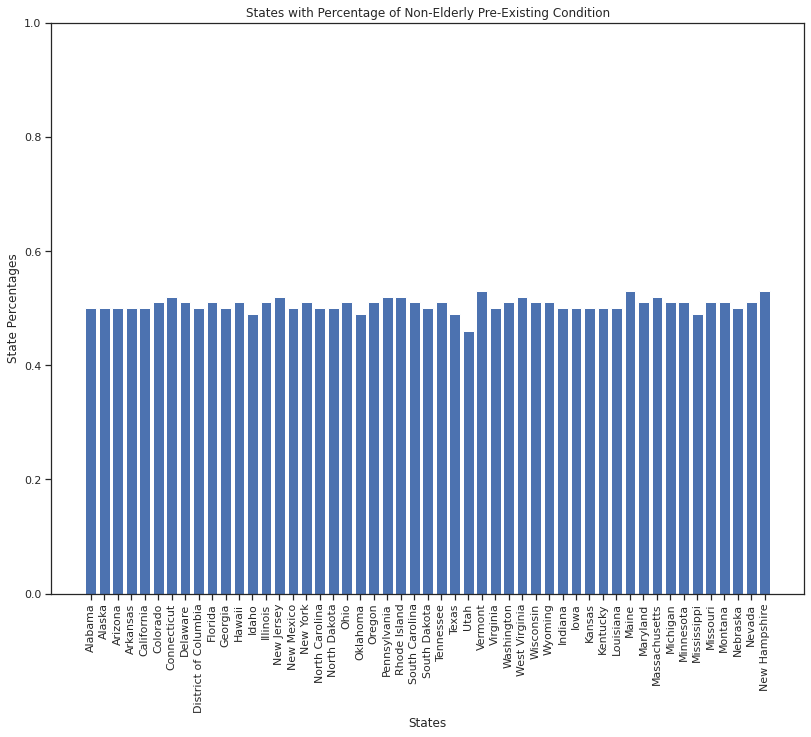

In [ ]:
# Fecthing Data From mysql to my python progame
cursor.execute("select States,Percent_of_Nonelderly from Stato")
result = cursor.fetchall
States = []
Percent_of_Nonelderly = []
for i in cursor:
    States.append(i[0])
    Percent_of_Nonelderly.append(i[1])    
print("Name of States = ", States)
print("Age of Percent_of_Nonelderly Pre-existing Conditions = ", Percent_of_Nonelderly)
#figure(figsize=(11, 5), dpi=80)
# Visulizing Data using Matplotlib
plt.bar(States, Percent_of_Nonelderly)
plt.ylim(0, 1)
plt.xlabel("States")
plt.ylabel("State Percentages")
plt.title("States with Percentage of Non-Elderly Pre-Existing Condition")
plt.xticks(rotation = 90)
plt.show()

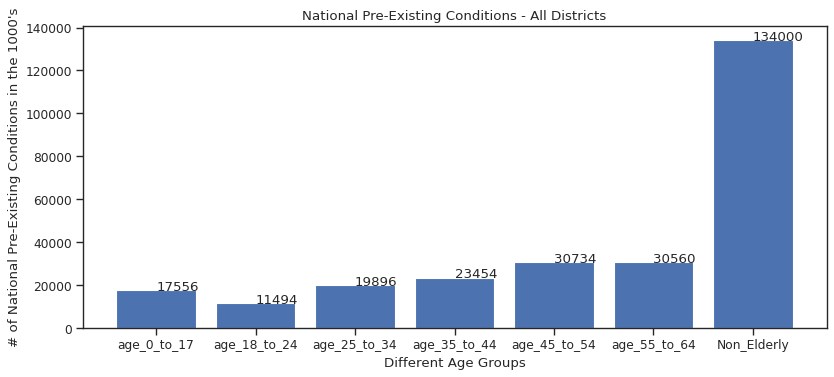

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(12, 5), dpi=80)

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
  
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    y = [17556,11494,19896,23454,30734,30560,134000,]
    x = ["age_0_to_17","age_18_to_24","age_25_to_34","age_35_to_44","age_45_to_54","age_55_to_64","Non_Elderly"]
      
    # making the bar chart on the data
    plt.bar(x, y)
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("National Pre-Existing Conditions - All Districts")
      
    # giving X and Y labels
    plt.xlabel("Different Age Groups")
    plt.ylabel("# of National Pre-Existing Conditions in the 1000's")
      
    # visualizing the plot
    plt.show()

In [ ]:
sql = "SELECT \
States, StatesPop.Population, Age_0_to_17, Age_18_to_24, Age_25_to_34, Age_35_to_44, Age_45_to_54, Age_55_to_64, Non_Elderly \
FROM sql3426897.Stato \
INNER JOIN sql3426897.StatesPop ON `Stato`.ID = StatesPop.ID"
mycursor.execute(sql)
myresult = mycursor.fetchall()
#for population in myresult:
  #print(population)
dataframing = pd.DataFrame(myresult)
dataframing.rename(columns={0:'States', 1: 'Population', 2: 'Age_0_to_17', 3: 'Age_18_to_24', 4: 'Age_25_to_34', 5: 'Age_35_to_44', 6: 'Age_45_to_54', 7:'Age_55_to_64', 8:'Non-Elderly'}, inplace=True);
dataframing.head(20)

,States,Population,Age_0_to_17,Age_18_to_24,Age_25_to_34,Age_35_to_44,Age_45_to_54,Age_55_to_64,Non-Elderly
0,Alabama,4921532,264900,170600,281100,348100,443800,451200,1959800
1,Alaska,731158,44600,30200,54200,53400,67900,76200,326400
2,Arizona,7421401,386200,245300,414300,490000,607500,619900,2763200
3,Arkansas,3030522,168500,103900,172900,206600,263400,262100,1177500
4,California,39368078,2171900,1446200,2654100,3011300,3813800,3581700,16679100
5,Colorado,5807719,299300,193800,377200,429200,519000,532500,2350900
6,Connecticut,3557006,182100,129400,201400,250500,387200,390500,1541100
7,Delaware,986809,48600,32500,56300,63100,93100,95500,389100
8,District of Columbia,712816,28100,29900,69700,55700,55800,52000,291300
9,Florida,21733312,973800,645200,1162000,1388700,1879800,1760800,7810300


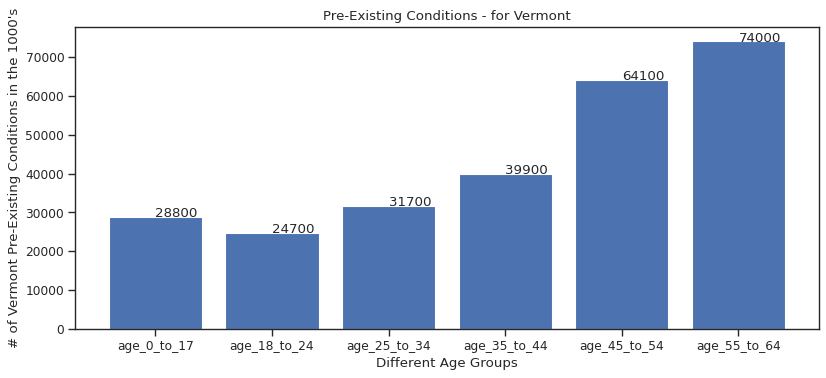

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(12, 5), dpi=80)

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
  
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    y = [28800,	24700,	31700,	39900,	64100,	74000]
    x = ["age_0_to_17","age_18_to_24","age_25_to_34","age_35_to_44","age_45_to_54","age_55_to_64"]
      
    # making the bar chart on the data
    plt.bar(x, y)
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("Pre-Existing Conditions - for Vermont")
      
    # giving X and Y labels
    plt.xlabel("Different Age Groups")
    plt.ylabel("# of Vermont Pre-Existing Conditions in the 1000's")
      
    # visualizing the plot
    plt.show()

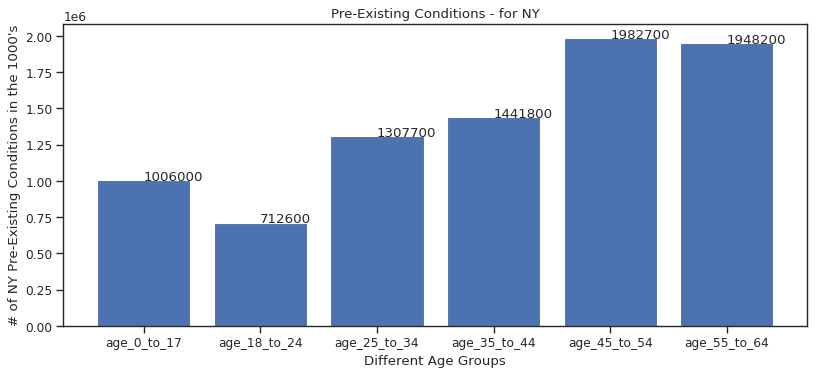

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(12, 5), dpi=80)

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
  
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    y = [1006000,	712600,	1307700,	1441800,	1982700,	1948200]
    x = ["Age_0_to_17","Age_18_to_24","Age_25_to_34","Age_35_to_44","Age_45_to_54","Age_55_to_64"]
      
    # making the bar chart on the data
    plt.bar(x, y)
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("Pre-Existing Conditions - for NY")
      
    # giving X and Y labels
    plt.xlabel("Different Age Groups")
    plt.ylabel("# of NY Pre-Existing Conditions in the 1000's")
      
    # visualizing the plot
    plt.show()

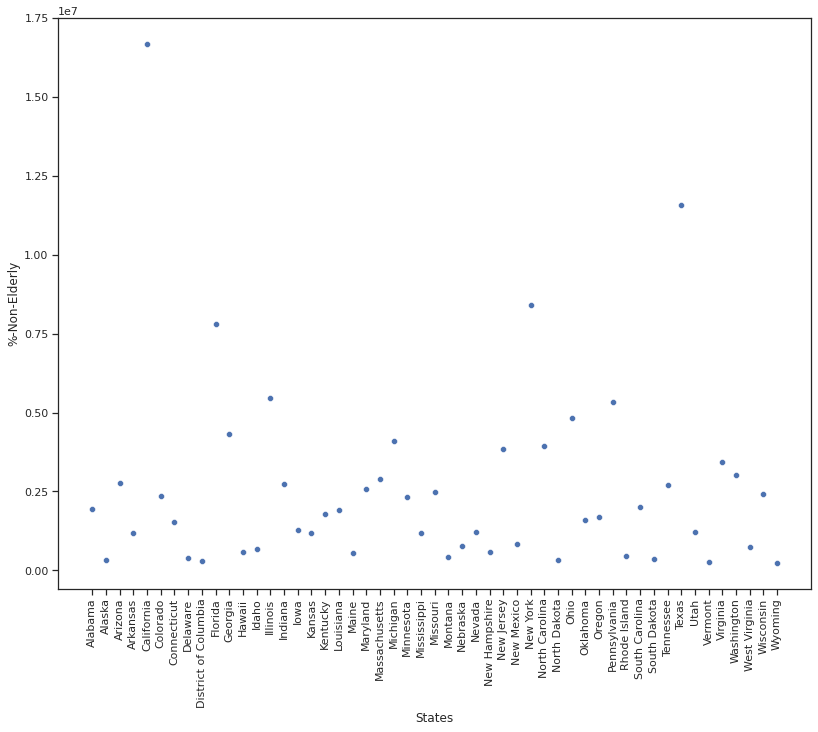

In [ ]:
sns.scatterplot(x='States',y='%-Non-Elderly', data=df)
#plt.figure(figsize = (15,8))
#f, ax = plt.subplots(figsize=(12, 9)
plt.rcParams["figure.figsize"] = [13.50, 10.50]
locs, labels = plt.xticks()
#plt.setp(labels, rotation=45)
plt.xticks(rotation=90)
plt.show()

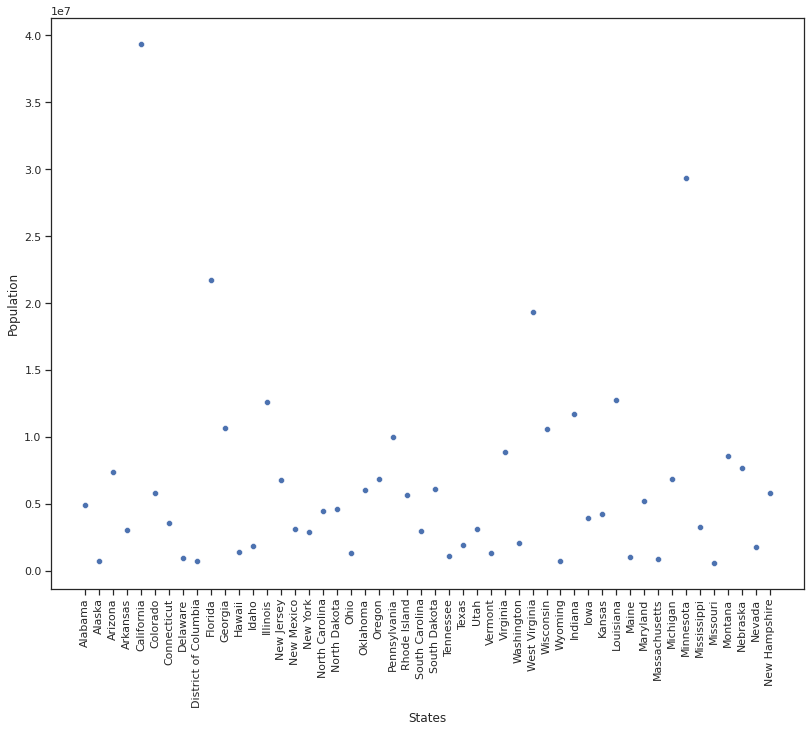

In [ ]:
sns.scatterplot(x='States',y='Population', data=dataframing)
#plt.figure(figsize = (15,8))
#f, ax = plt.subplots(figsize=(12, 9)
locs, labels = plt.xticks()
#plt.setp(labels, rotation=45)
plt.xticks(rotation=90)
plt.show()

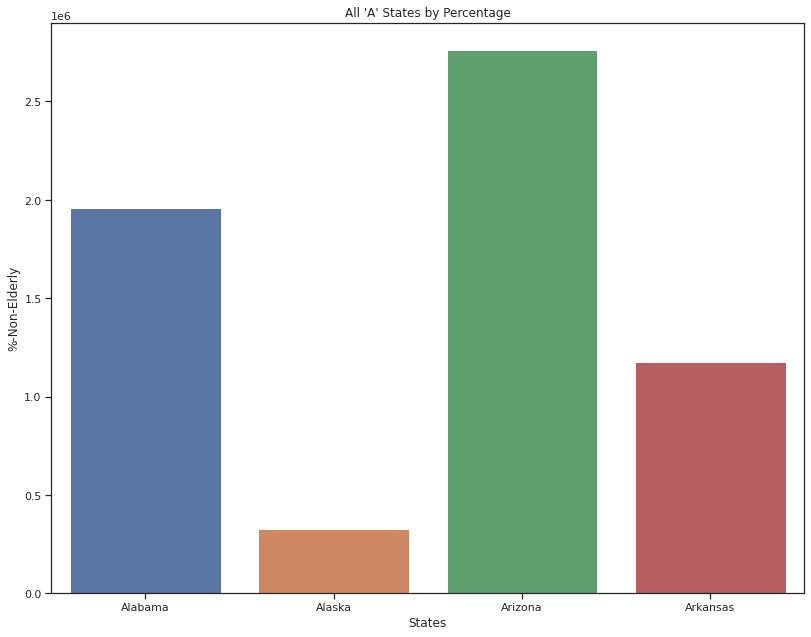

In [ ]:
# create a view into the dataframe restricted to States that start with 'A'
dfi = df.loc[df.loc[:, 'States'].str.startswith('A')]
plt.title("All 'A' States by Percentage")
sns.barplot(x = "States",
            y = "%-Non-Elderly",
            data = dfi)
plt.show()

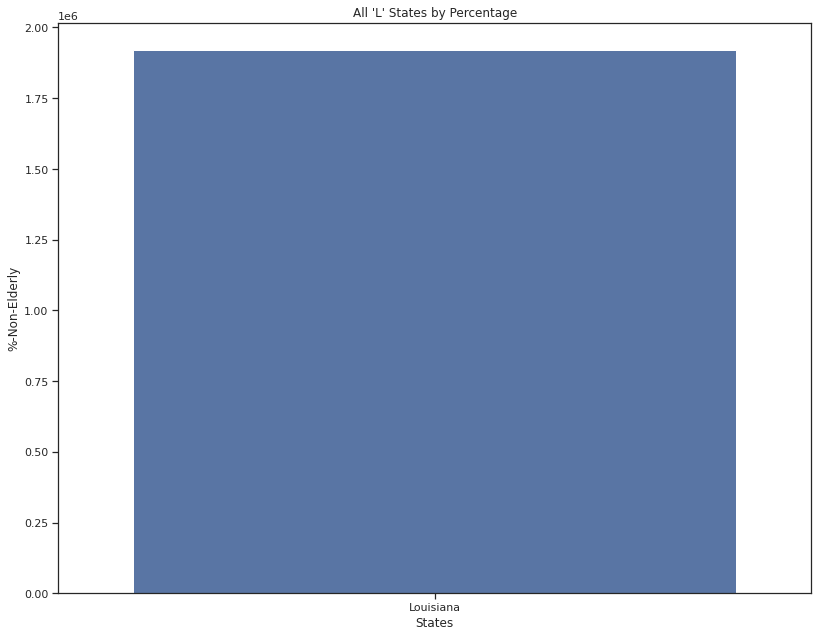

In [ ]:
# create a view into the dataframe restricted to States that start with 'A'
dfi = df.loc[df.loc[:, 'States'].str.startswith('L')]
plt.title("All 'L' States by Percentage")
sns.barplot(x = "States",
            y = "%-Non-Elderly",
            data = dfi)
plt.show()

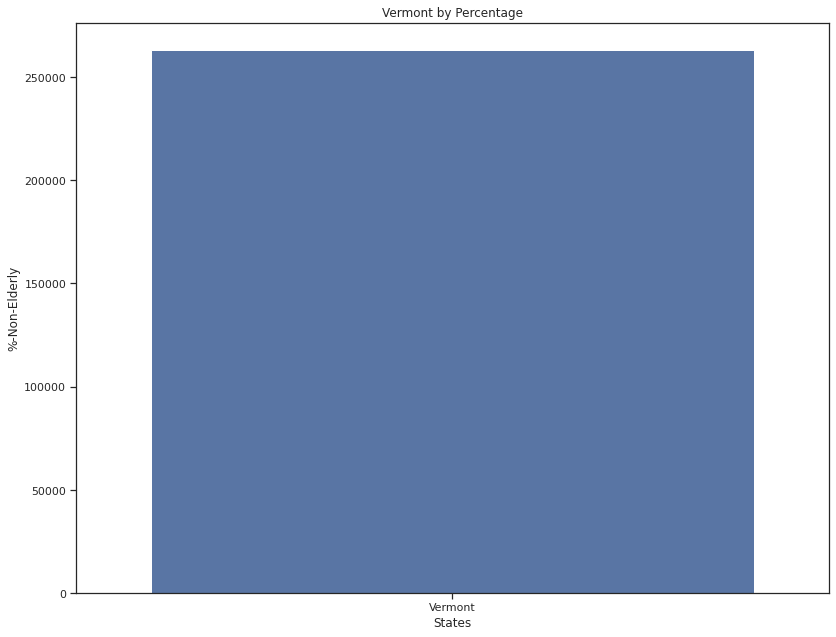

In [ ]:
# create a view into the dataframe restricted to States that start with 'A'
dfi = df.loc[df.loc[:, 'States'].str.startswith('Ver')]
plt.title("Vermont by Percentage")
sns.barplot(x = "States",
            y = "%-Non-Elderly",
            data = dfi)
plt.show()

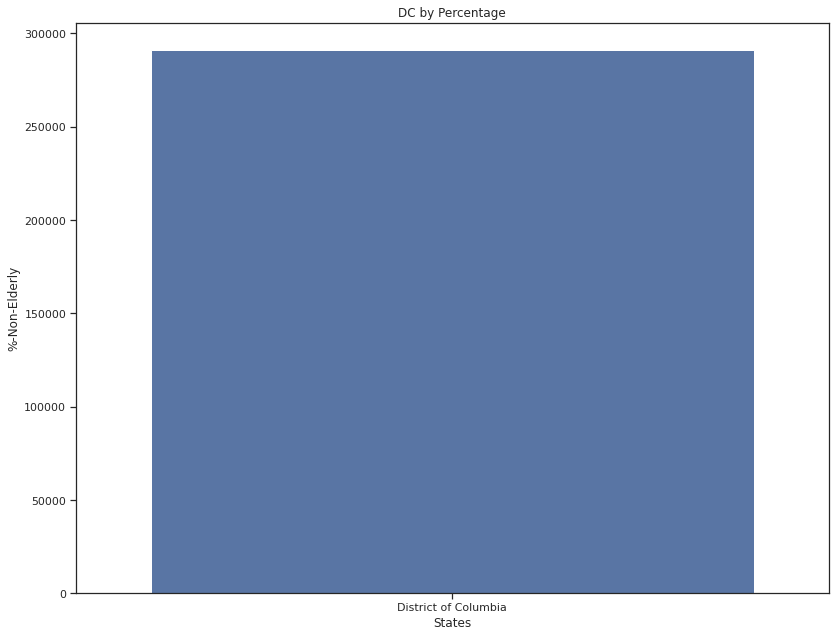

In [ ]:
# create a view into the dataframe restricted to States that start with 'A'
dfi = df.loc[df.loc[:, 'States'].str.startswith('Dis')]
plt.title("DC by Percentage")
sns.barplot(x = "States",
            y = "%-Non-Elderly",
            data = dfi)
plt.show()

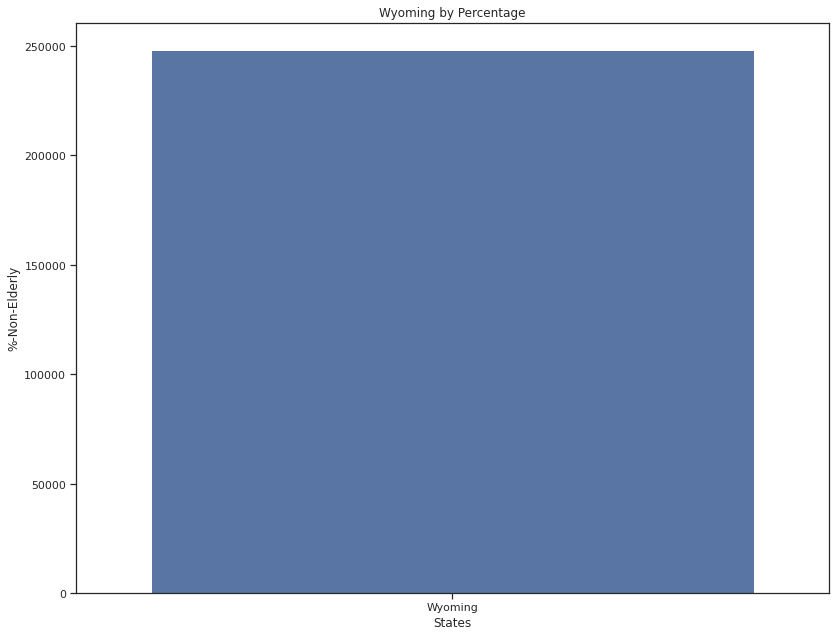

In [ ]:
# create a view into the dataframe restricted to States that start with 'A'
dfi = df.loc[df.loc[:, 'States'].str.startswith('Wy')]
plt.title("Wyoming by Percentage")
sns.barplot(x = "States",
            y = "%-Non-Elderly",
            data = dfi)
plt.show()

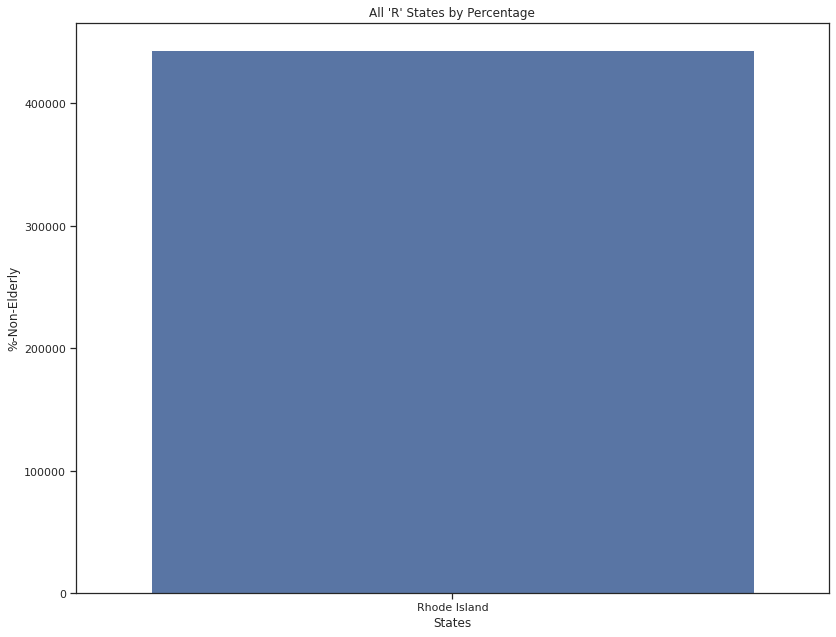

In [ ]:
# create a view into the dataframe restricted to States that start with 'A'
dfi = df.loc[df.loc[:, 'States'].str.startswith('R')]
plt.title("All 'R' States by Percentage")
sns.barplot(x = "States",
            y = "%-Non-Elderly",
            data = dfi)
plt.show()

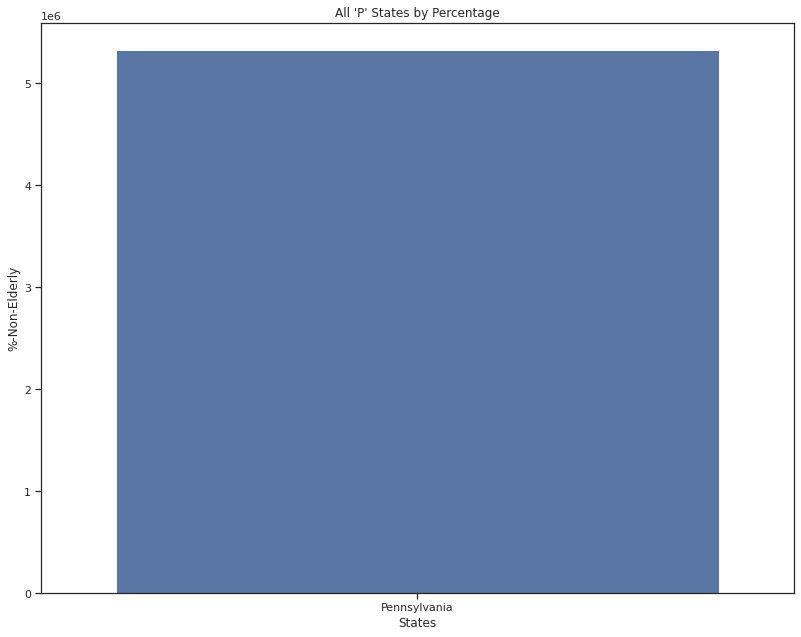

In [ ]:
# create a view into the dataframe restricted to States that start with 'A'
dfi = df.loc[df.loc[:, 'States'].str.startswith('P')]
plt.title("All 'P' States by Percentage")
sns.barplot(x = "States",
            y = "%-Non-Elderly",
            data = dfi)
plt.show()

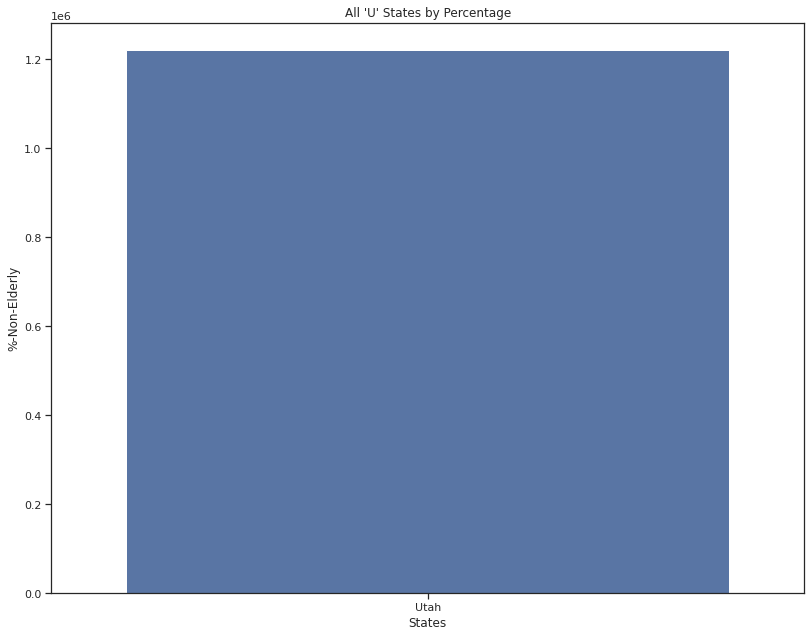

In [ ]:
# create a view into the dataframe restricted to States that start with 'A'
dfi = df.loc[df.loc[:, 'States'].str.startswith('U')]
plt.title("All 'U' States by Percentage")
sns.barplot(x = "States",
            y = "%-Non-Elderly",
            data = dfi)
plt.show()

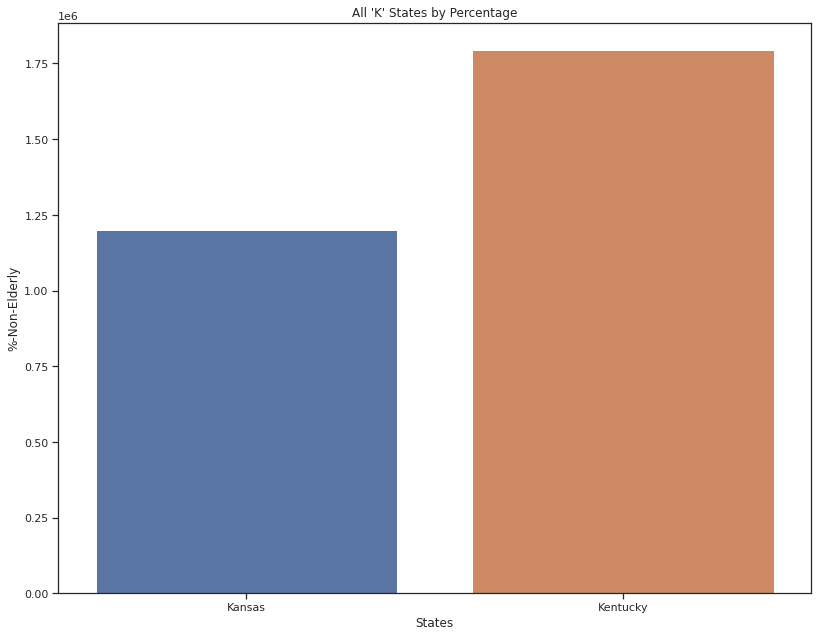

In [ ]:
# create a view into the dataframe restricted to States that start with 'A'
dfi = df.loc[df.loc[:, 'States'].str.startswith('K')]
plt.title("All 'K' States by Percentage")
sns.barplot(x = "States",
            y = "%-Non-Elderly",
            data = dfi)
plt.show()

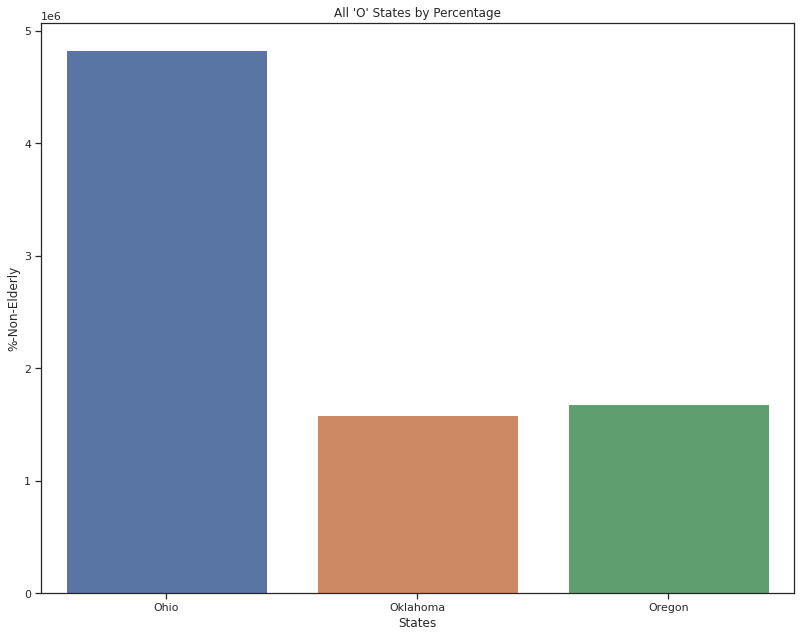

In [ ]:
# create a view into the dataframe restricted to States that start with 'A'
dfi = df.loc[df.loc[:, 'States'].str.startswith('O')]
plt.title("All 'O' States by Percentage")
sns.barplot(x = "States",
            y = "%-Non-Elderly",
            data = dfi)
plt.show()

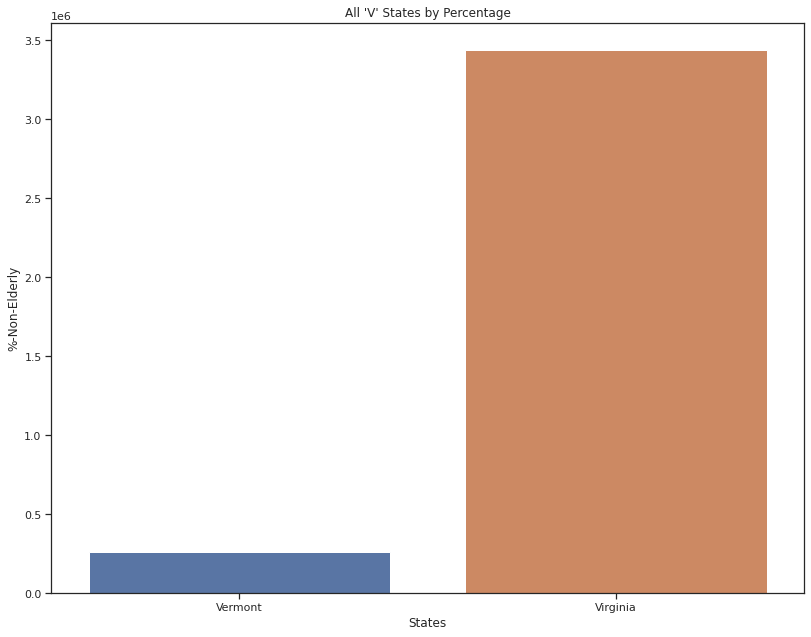

In [ ]:
# create a view into the dataframe restricted to States that start with 'A'
dfi = df.loc[df.loc[:, 'States'].str.startswith('V')]
plt.title("All 'V' States by Percentage")
sns.barplot(x = "States",
            y = "%-Non-Elderly",
            data = dfi)
plt.show()

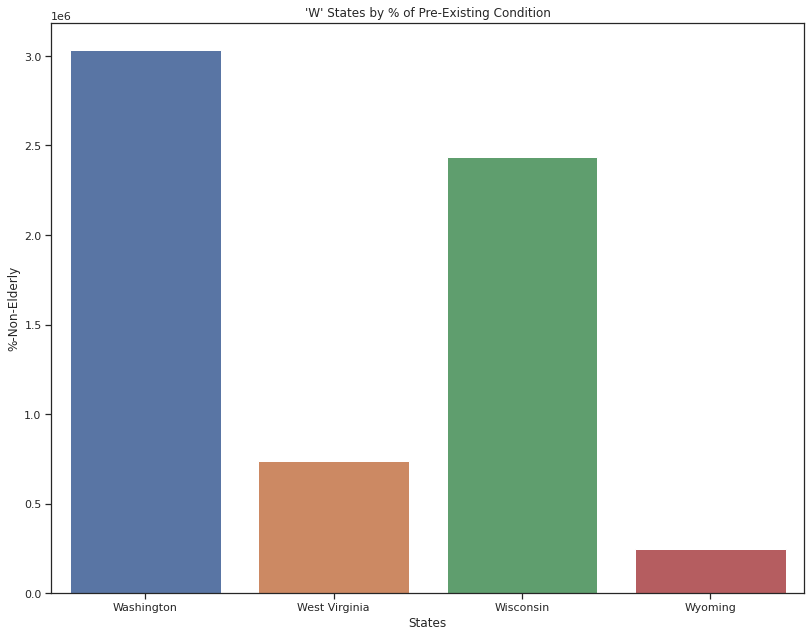

In [ ]:
# create a view into the dataframe restricted to States that start with 'W'
dfi = df.loc[df.loc[:, 'States'].str.startswith('W')]
plt.title("'W' States by % of Pre-Existing Condition")
sns.barplot(x = "States",
            y = "%-Non-Elderly",
            data = dfi)
plt.show()

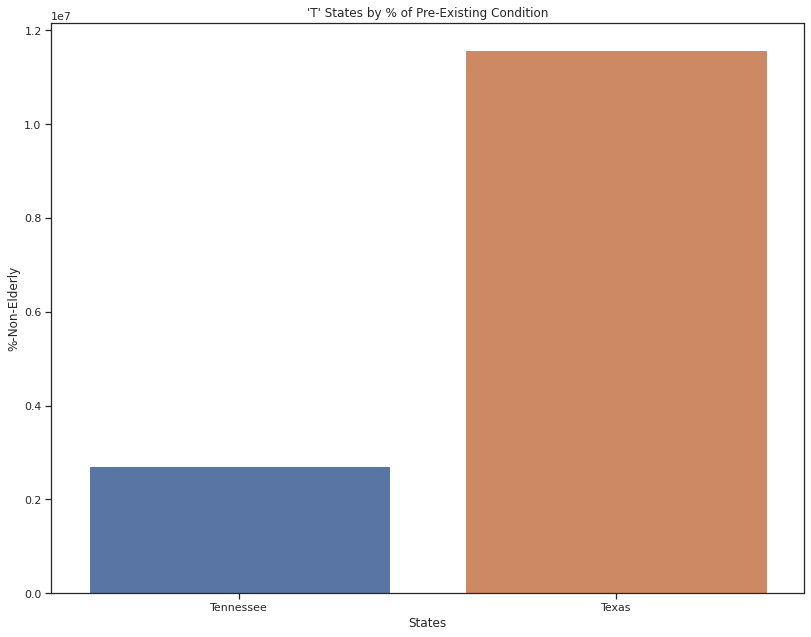

In [ ]:
# create a view into the dataframe restricted to States that start with 'W'
dfi = df.loc[df.loc[:, 'States'].str.startswith('T')]
plt.title("'T' States by % of Pre-Existing Condition")
sns.barplot(x = "States",
            y = "%-Non-Elderly",
            data = dfi)
plt.show()

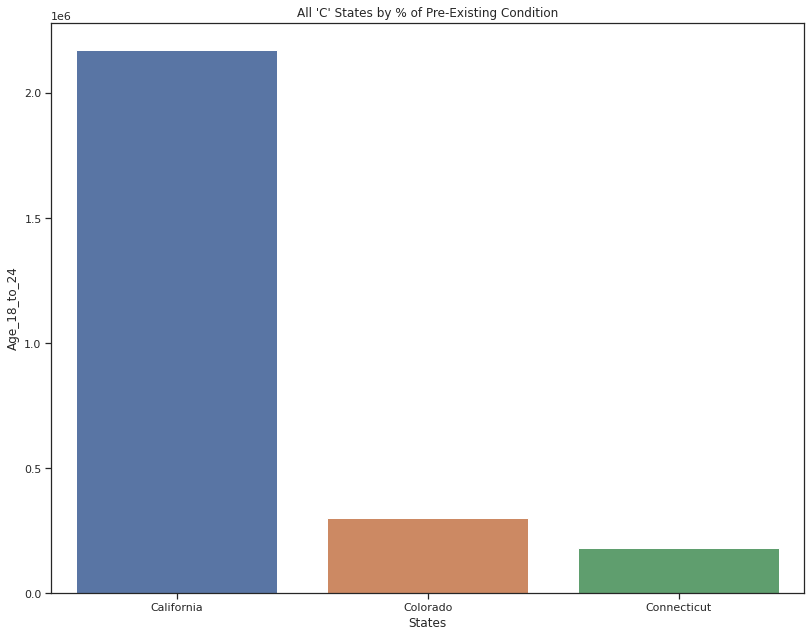

In [ ]:
# create a view into the dataframe restricted to States that start with 'C'
dfi = df.loc[df.loc[:, 'States'].str.startswith('C')]
plt.title("All 'C' States by % of Pre-Existing Condition")
sns.barplot(x = "States",
            y = "Age_18_to_24",
            data = dfi)
plt.show()

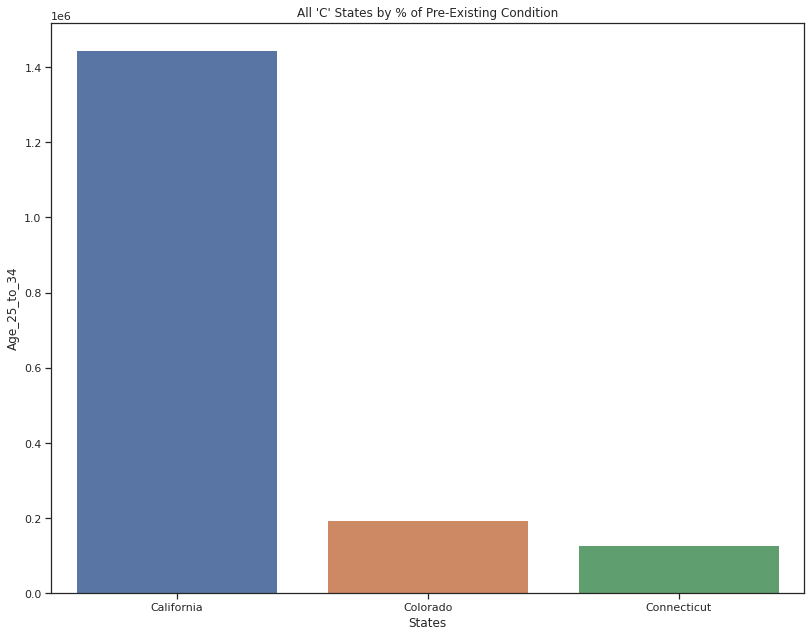

In [ ]:
# create a view into the dataframe restricted to States that start with 'C'
dfi = df.loc[df.loc[:, 'States'].str.startswith('C')]
plt.title("All 'C' States by % of Pre-Existing Condition")
sns.barplot(x = "States",
            y = "Age_25_to_34",
            data = dfi)
plt.show()

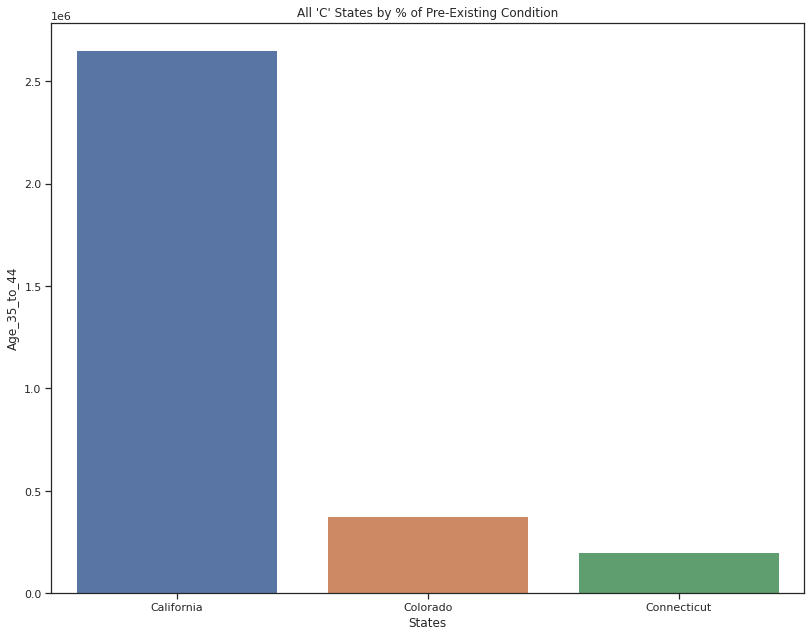

In [ ]:
# create a view into the dataframe restricted to States that start with 'C'
dfi = df.loc[df.loc[:, 'States'].str.startswith('C')]
plt.title("All 'C' States by % of Pre-Existing Condition")
sns.barplot(x = "States",
            y = "Age_35_to_44",
            data = dfi)
plt.show()

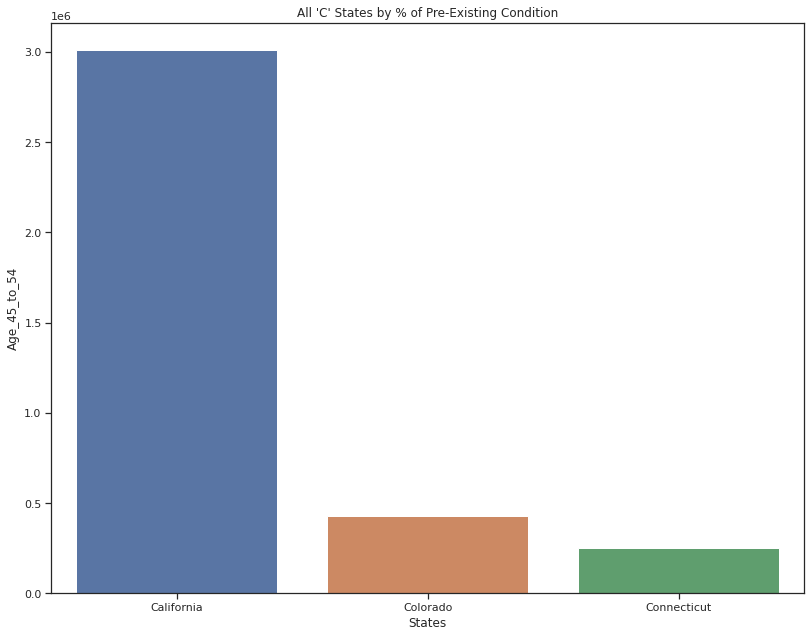

In [ ]:
# create a view into the dataframe restricted to States that start with 'C'
dfi = df.loc[df.loc[:, 'States'].str.startswith('C')]
plt.title("All 'C' States by % of Pre-Existing Condition")
sns.barplot(x = "States",
            y = "Age_45_to_54",
            data = dfi)
plt.show()

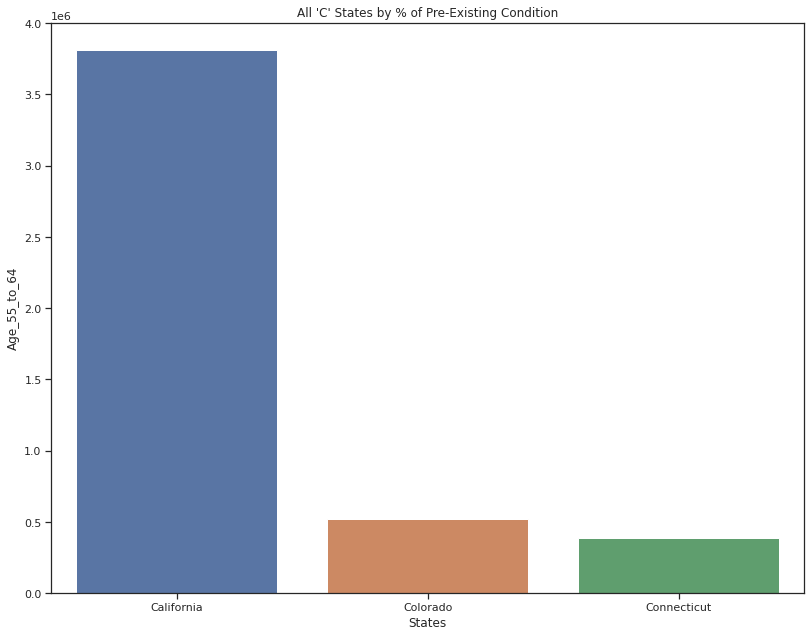

In [ ]:
# create a view into the dataframe restricted to States that start with 'C'
dfi = df.loc[df.loc[:, 'States'].str.startswith('C')]
plt.title("All 'C' States by % of Pre-Existing Condition")
sns.barplot(x = "States",
            y = "Age_55_to_64",
            data = dfi)
plt.show()

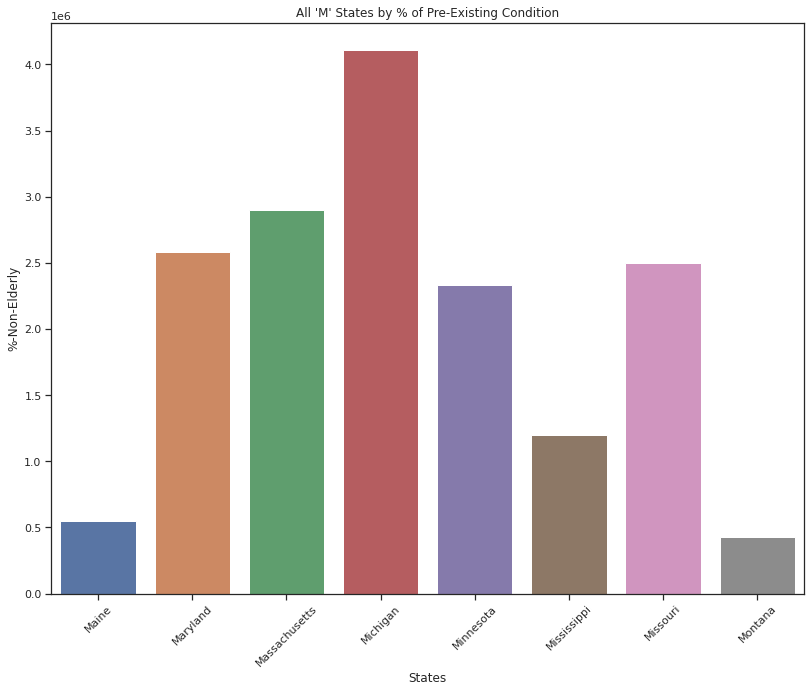

In [ ]:
# create a view into the dataframe restricted to States that start with 'M'
dfi = df.loc[df.loc[:, 'States'].str.startswith('M')]
plt.title("All 'M' States by % of Pre-Existing Condition")
sns.barplot(x = "States",
            y = "%-Non-Elderly",
            data = dfi)
plt.xticks(rotation=45)
plt.show()

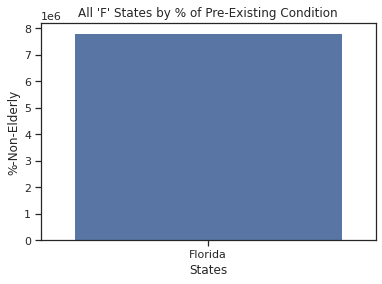

In [ ]:
# create a view into the dataframe restricted to States that start with 'F'
dfi = df.loc[df.loc[:, 'States'].str.startswith('F')]
plt.title("All 'F' States by % of Pre-Existing Condition")
sns.barplot(x = "States",
            y = "%-Non-Elderly",
            data = dfi)
plt.show()

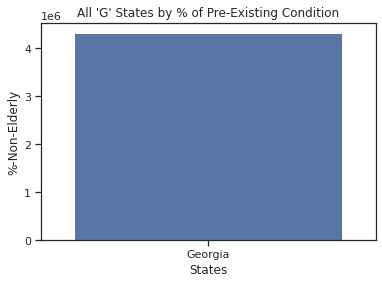

In [ ]:
# create a view into the dataframe restricted to States that start with 'G'
dfi = df.loc[df.loc[:, 'States'].str.startswith('G')]
plt.title("All 'G' States by % of Pre-Existing Condition")
sns.barplot(x = "States",
            y = "%-Non-Elderly",
            data = dfi)
plt.show()

In [ ]:
df.describe()

,Age_0_to_17,Age_18_to_24,Age_25_to_34,Age_35_to_44,Age_45_to_54,Age_55_to_64,Non-Elderly,%-Non-Elderly
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,6.460473e+06,3.442373e+05,2.253725e+05,3.901176e+05,4.598745e+05,6.026373e+05,5.992255e+05,2.621459e+06
std,7.375082e+06,4.021673e+05,2.609533e+05,4.724971e+05,5.462144e+05,6.957909e+05,6.564790e+05,3.027687e+06
min,5.823280e+05,2.810000e+04,2.100000e+04,3.170000e+04,3.990000e+04,5.090000e+04,5.200000e+04,2.483000e+05
25%,1.805850e+06,9.690000e+04,5.885000e+04,9.875000e+04,1.237000e+05,1.561000e+05,1.705000e+05,7.055500e+05
50%,4.477251e+06,2.404000e+05,1.555000e+05,2.533000e+05,3.199000e+05,4.144000e+05,4.146000e+05,1.795500e+06
75%,7.557506e+06,3.856500e+05,2.528000e+05,4.513500e+05,5.126000e+05,6.934000e+05,7.040000e+05,2.968750e+06
max,3.936808e+07,2.171900e+06,1.446200e+06,2.654100e+06,3.011300e+06,3.813800e+06,3.581700e+06,1.667910e+07


In [ ]:
df1.head().T

,0,1,2,3,4
id,1,2,3,4,5
States,Alabama,Alaska,Arizona,Arkansas,California
Dist. Rep.,4921532,731158,7421401,3030522,39368078
Age_0_to_17,264900,44600,386200,168500,2171900
Age_18_to_24,170600,30200,245300,103900,1446200
Age_25_to_34,281100,54200,414300,172900,2654100
Age_35_to_44,348100,53400,490000,206600,3011300
Age_45_to_54,443800,67900,607500,263400,3813800
Age_55_to_64,451200,76200,619900,262100,3581700
%-Non-Elderly,1959800,326400,2763200,1177500,16679100


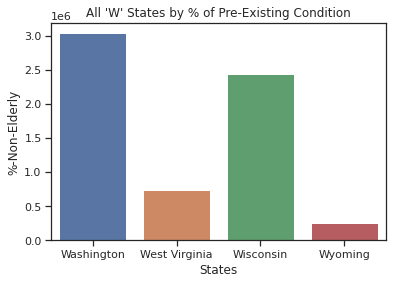

In [ ]:
# create a view into the dataframe restricted to States that start with 'I'
dfi = df1.loc[df.loc[:, 'States'].str.startswith('W')]
plt.title("All 'W' States by % of Pre-Existing Condition")
sns.barplot(x = "States",
            y = "%-Non-Elderly",
            data = dfi)
plt.show()

In [ ]:
# abbreviated decriptives
df.describe()#.#T#[['mean', 'min', 'max']].round(1)

,Age_0_to_17,Age_18_to_24,Age_25_to_34,Age_35_to_44,Age_45_to_54,Age_55_to_64,Non-Elderly,%-Non-Elderly
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,6.460473e+06,3.442373e+05,2.253725e+05,3.901176e+05,4.598745e+05,6.026373e+05,5.992255e+05,2.621459e+06
std,7.375082e+06,4.021673e+05,2.609533e+05,4.724971e+05,5.462144e+05,6.957909e+05,6.564790e+05,3.027687e+06
min,5.823280e+05,2.810000e+04,2.100000e+04,3.170000e+04,3.990000e+04,5.090000e+04,5.200000e+04,2.483000e+05
25%,1.805850e+06,9.690000e+04,5.885000e+04,9.875000e+04,1.237000e+05,1.561000e+05,1.705000e+05,7.055500e+05
50%,4.477251e+06,2.404000e+05,1.555000e+05,2.533000e+05,3.199000e+05,4.144000e+05,4.146000e+05,1.795500e+06
75%,7.557506e+06,3.856500e+05,2.528000e+05,4.513500e+05,5.126000e+05,6.934000e+05,7.040000e+05,2.968750e+06
max,3.936808e+07,2.171900e+06,1.446200e+06,2.654100e+06,3.011300e+06,3.813800e+06,3.581700e+06,1.667910e+07
